# Import Libraries

#### importing various python labraries and importing the dataset

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import pickle
import math
import ast

# Reading Dataframe

#### reading the datasets using pandas.read_csv

In [57]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv') 

In [58]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Finding the dimension of the dataframe

In [59]:
movies.shape

(4803, 20)

In [60]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [61]:
movies['year'] = movies['release_date'].apply(lambda x:str(x)[0:4])

In [62]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [63]:
movies = movies.merge(credits,on='title')

In [64]:
movies.head()
# budget
# homepage
# id
# original_language
# original_title
# popularity
# production_comapny
# production_countries

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,year,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [65]:
movies = movies[['movie_id','title','overview','genres','keywords','release_date','runtime','status','vote_average','vote_count','year','cast','crew']]

In [66]:
movies.head()

,movie_id,title,overview,genres,keywords,release_date,runtime,status,vote_average,vote_count,year,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",2009-12-10,162.0,Released,7.2,11800,2009,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",2007-05-19,169.0,Released,6.9,4500,2007,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",2015-10-26,148.0,Released,6.3,4466,2015,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",2012-07-16,165.0,Released,7.6,9106,2012,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",2012-03-07,132.0,Released,6.1,2124,2012,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [67]:
list(movies.columns)

['movie_id',
 'title',
 'overview',
 'genres',
 'keywords',
 'release_date',
 'runtime',
 'status',
 'vote_average',
 'vote_count',
 'year',
 'cast',
 'crew']

In [68]:
movies.count()

movie_id        4809
title           4809
overview        4806
genres          4809
keywords        4809
release_date    4808
runtime         4807
status          4809
vote_average    4809
vote_count      4809
year            4809
cast            4809
crew            4809
dtype: int64

In [69]:
movies.describe()

,movie_id,runtime,vote_average,vote_count
count,4809.000000,4807.000000,4809.000000,4809.000000
mean,57120.571429,106.882255,6.092514,690.331670
std,88653.369849,22.602535,1.193989,1234.187111
min,5.000000,0.000000,0.000000,0.000000
25%,9012.000000,94.000000,5.600000,54.000000
50%,14624.000000,103.000000,6.200000,235.000000
75%,58595.000000,118.000000,6.800000,737.000000
max,459488.000000,338.000000,10.000000,13752.000000


# EDA(Exploratory Data Analysis)
#### The runtime of movies has changed over the years

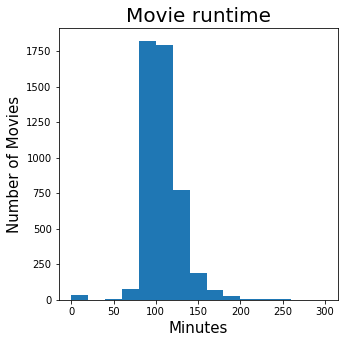

In [70]:
plt.figure(figsize=(5,5))
plt.hist(movies['runtime'], range=(0,300), bins=15)
plt.title('Movie runtime', fontsize=20)
plt.xlabel('Minutes', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

##### We can see from the histogram that the majority of the movies have a meantime between 90 to 120 minutes.

In [71]:
grouped_movies = movies['runtime'].groupby(movies['year']).describe()
grouped_movies.dropna(inplace=True)
avg_runtime_by_year = grouped_movies['mean']
avg_runtime_min = grouped_movies['mean'] - grouped_movies['std']
avg_runtime_max = grouped_movies['mean'] + grouped_movies['std']

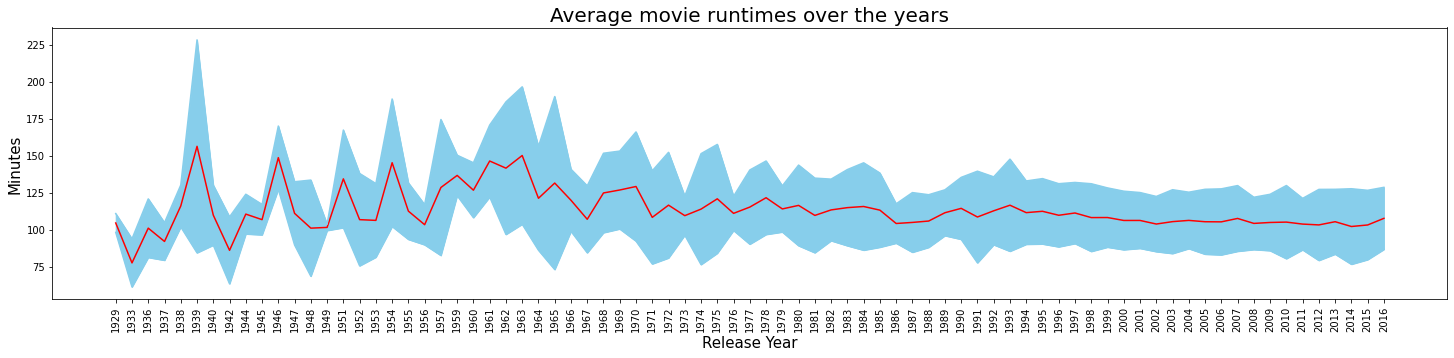

In [72]:
fig,x=plt.subplots(figsize=(25,5))
x.plot(avg_runtime_by_year, color = 'red')
x.plot(avg_runtime_min, color = 'skyblue')
x.plot(avg_runtime_max, color = 'skyblue')
x.fill_between(grouped_movies.index, avg_runtime_min, avg_runtime_max, color = 'skyblue')
x.set_title('Average movie runtimes over the years', fontsize = 20)
x.set_xlabel('Release Year', fontsize = 15)
x.set_ylabel('Minutes', fontsize = 15)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
movies_by_decades = movies.copy()
movies_by_decades = movies_by_decades.dropna()
movies_by_decades = movies_by_decades[movies_by_decades['runtime']>40]
movies_by_decades['year'] = movies_by_decades['year'].astype('int64')
movies_by_decades['year'] = ((movies_by_decades['year']//10) * 10).astype('int64')

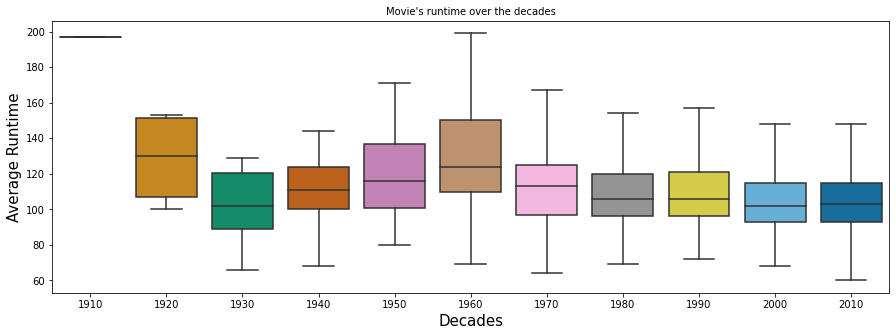

In [74]:
plt.figure(figsize=(15,5))
sns.boxplot(x='year', y='runtime', data=movies_by_decades, palette='colorblind', showfliers=False)
plt.title('Movie\'s runtime over the decades', fontsize=10)
plt.xlabel('Decades', fontsize=15)
plt.ylabel('Average Runtime', fontsize='15')
plt.show()

#### By analyzing the graphs above that represent the average runtimes of movies over the past few decades, we can conclude that movie runtimes have actually changed slightly over time.

In [75]:
print(movies_by_decades.title[movies_by_decades['runtime']==movies_by_decades['runtime'].max()])
print(movies_by_decades.runtime[movies_by_decades['runtime']==movies_by_decades['runtime'].max()])
print(movies_by_decades.title[movies_by_decades['runtime']==movies_by_decades['runtime'].min()])
print(movies_by_decades.runtime[movies_by_decades['runtime']==movies_by_decades['runtime'].min()])

2390    Carlos
Name: title, dtype: object
2390    338.0
Name: runtime, dtype: float64
3631    Sea Rex 3D: Journey to a Prehistoric World
Name: title, dtype: object
3631    41.0
Name: runtime, dtype: float64


### The longest movie among the given datasets is Carlos, which lasts 338 minutes, or 5.6 hours.
### The shortest movie amoung the given datasets is Sea Rex 3D: Journey to a Prehistoric World, which lasts 41 minutes.

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


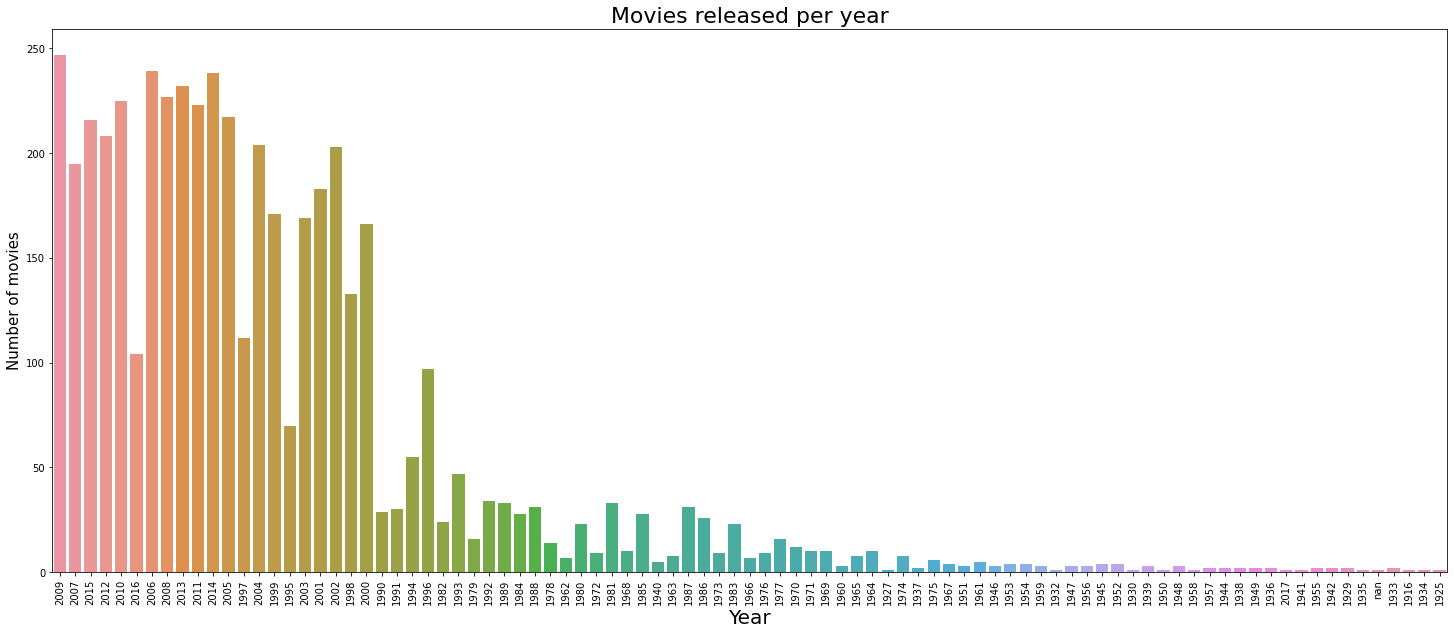

In [76]:
plt.figure(figsize=(25,10))
sns.countplot(movies['year'])
plt.title('Movies released per year', fontsize = 22)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of movies', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### From the above graph we can conclude that 2009 has the highest number of movies released.

In [77]:
print("In 2009, {} movies have been released.".format(movies['year'].value_counts()[0]))

In 2009, 247 movies have been released.


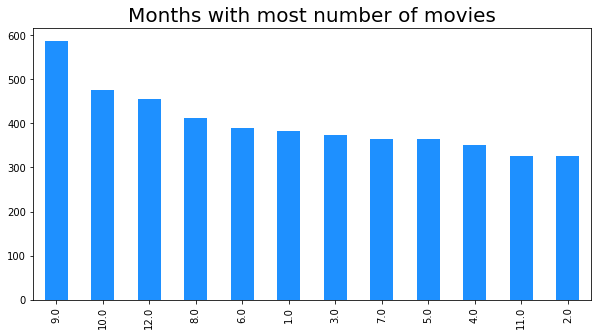

In [78]:
plt.figure(figsize=(10,5))
(pd.to_datetime(movies['release_date'])).dt.month.value_counts().plot.bar(color='dodgerblue')
plt.title("Months with most number of movies", fontsize=20)
plt.show()

#### We can say that the month of September has seen the most number of movie releases.

In [79]:
movies['runtime'] = movies['runtime'].apply(lambda x:float(round((x/60),2)))
movies['runtime'] = movies['runtime'].astype('object')

In [80]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [81]:
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)

In [82]:
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [83]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 9:
            L.append(i['name'])
        counter+=1
    return L 

In [84]:
movies['cast'] = movies['cast'].apply(convert3)
movies.head()

,movie_id,title,overview,genres,keywords,release_date,runtime,status,vote_average,vote_count,year,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",2009-12-10,2.7,Released,7.2,11800,2009,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",2007-05-19,2.82,Released,6.9,4500,2007,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",2015-10-26,2.47,Released,6.3,4466,2015,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",2012-07-16,2.75,Released,7.6,9106,2012,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",2012-03-07,2.2,Released,6.1,2124,2012,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [85]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:9])

In [86]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [87]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [88]:
#movies['overview'] = movies['overview'].apply(lambda x:str(x).split())
movies.head()

,movie_id,title,overview,genres,keywords,release_date,runtime,status,vote_average,vote_count,year,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",2009-12-10,2.7,Released,7.2,11800,2009,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",2007-05-19,2.82,Released,6.9,4500,2007,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",2015-10-26,2.47,Released,6.3,4466,2015,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",2012-07-16,2.75,Released,7.6,9106,2012,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",2012-03-07,2.2,Released,6.1,2124,2012,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [89]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [90]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [91]:
movies['tags'] = (movies['overview'].apply(lambda x:str(x).split())) + (movies['genres']) + (movies['keywords']) + (movies['cast']) + (movies['crew'])
movies = movies.drop(columns=['keywords','year','cast','crew'])
movies.head()

,movie_id,title,overview,genres,release_date,runtime,status,vote_average,vote_count,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]",2009-12-10,2.7,Released,7.2,11800,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",2007-05-19,2.82,Released,6.9,4500,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]",2015-10-26,2.47,Released,6.3,4466,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]",2012-07-16,2.75,Released,7.6,9106,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]",2012-03-07,2.2,Released,6.1,2124,"[John, Carter, is, a, war-weary,, former, mili..."


In [92]:
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x))
movies.head()

,movie_id,title,overview,genres,release_date,runtime,status,vote_average,vote_count,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]",2009-12-10,2.7,Released,7.2,11800,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",2007-05-19,2.82,Released,6.9,4500,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]",2015-10-26,2.47,Released,6.3,4466,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]",2012-07-16,2.75,Released,7.6,9106,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]",2012-03-07,2.2,Released,6.1,2124,"John Carter is a war-weary, former military ca..."


In [93]:
movies['vote_average'] = movies['vote_average'].astype('object')
movies['vote_count'] = movies['vote_count'].astype('object')

# Model Building - Recommendation System

#### The next step will be to create a recommendation system based on column tags formed by concatenating overview, genres, keywords, cast, and crew columns.

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [95]:
vector = cv.fit_transform(movies['tags']).toarray()

In [96]:
vector.shape

(4809, 5000)

In [97]:
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
similarity = cosine_similarity(vector)

In [99]:
similarity

array([[1.        , 0.08000711, 0.05735393, ..., 0.0244558 , 0.0270369 ,
        0.        ],
       [0.08000711, 1.        , 0.05812382, ..., 0.02478408, 0.        ,
        0.        ],
       [0.05735393, 0.05812382, 1.        , ..., 0.02665009, 0.        ,
        0.        ],
       ...,
       [0.0244558 , 0.02478408, 0.02665009, ..., 1.        , 0.07537784,
        0.04652421],
       [0.0270369 , 0.        , 0.        , ..., 0.07537784, 1.        ,
        0.05143445],
       [0.        , 0.        , 0.        , ..., 0.04652421, 0.05143445,
        1.        ]])

In [100]:
def recommend(movie):
    index = movies[movies['title'] == movie].index[0]
    distances = similarity[index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[0:11]
    for i in movies_list:
        print(movies.iloc[i[0]].title)

In [101]:
recommend('The Avengers')

The Avengers
Avengers: Age of Ultron
Captain America: Civil War
Iron Man 2
Iron Man 3
Iron Man
Captain America: The First Avenger
Ant-Man
Thor: The Dark World
Captain America: The Winter Soldier
Thor


In [102]:
pickle.dump(movies,open('movie_list.pkl','wb'))

In [103]:
pickle.dump(movies.to_dict(),open('movies_dict.pkl','wb'))

In [104]:
pickle.dump(similarity,open('similarity.pkl','wb'))